## В этом ноутбуке:
1. Работаем с датасетом Fashion Mnist
2. Сделаем и обучим модель, которая будет классифицировать объекты из этого датасета. Всего классов 10
3. Посмотрим на более сложную модель, но дающую лучший результат на валидационной выборке

In [0]:
# Необходимые импорты
from keras import Sequential
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Reshape, InputLayer, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Датасет встроен в Keras, так что его можно легко скачать:

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

В датасете всего 10 классов, перечислим их в списке fashion_mnist_labels:

In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


Также посмотрим на изображения:

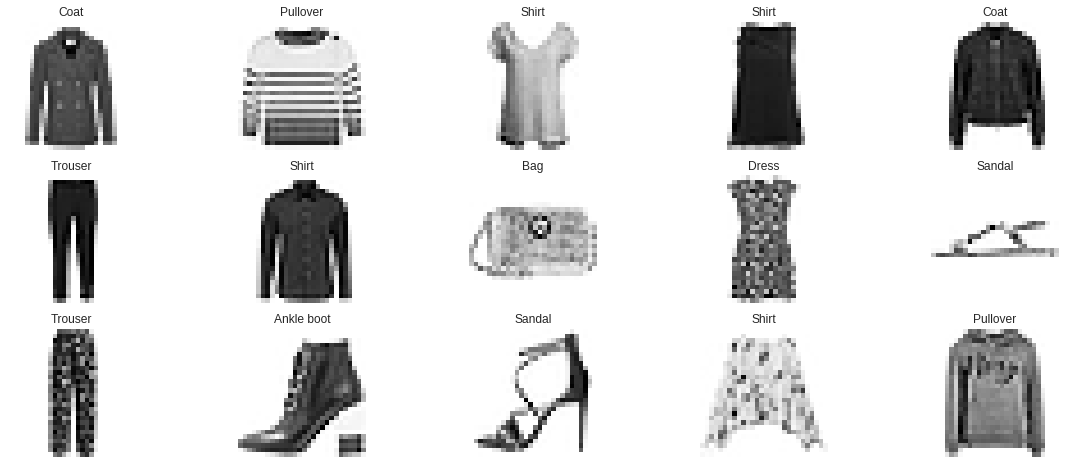

In [31]:
# Печатаем случайно выбранные 15 изображений:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    true_index = y_test[index]
    ax.set_title("{}".format(fashion_mnist_labels[true_index]))

Посмотрим каково число объектов в выборках:

In [32]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Число объектов в обучающей/тестовой выборках:
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Посмотрим как выглядит y_train/y_test

In [33]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

__Вопрос__: Задача классификации, значит что необходимо сделать с y_train/y_test?

In [0]:
# <Your code>
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Теперь объявим модель. Можете использовать любые слои и всё, что мы узнали за прошедшую неделю

Модель должна достичь примерно 0.83 accuracy на валидачионной выборке

In [38]:
# <Your code>
model = Sequential()

model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          18496     
__________

In [0]:
# Скомпилировать модель:
# <Your code>
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['acc'])

In [40]:
# Сделать fit. 10% выборки отвести под валидационную
# <Your code>
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 17s 314us/step - loss: 5.3613 - acc: 0.5701 - val_loss: 0.3941 - val_acc: 0.8545
Epoch 2/5
54000/54000 [==============================] - 16s 300us/step - loss: 0.3897 - acc: 0.8617 - val_loss: 0.3181 - val_acc: 0.8843
Epoch 3/5
54000/54000 [==============================] - 16s 300us/step - loss: 0.3343 - acc: 0.8797 - val_loss: 0.2995 - val_acc: 0.8907
Epoch 4/5
54000/54000 [==============================] - 16s 301us/step - loss: 0.3094 - acc: 0.8888 - val_loss: 0.3055 - val_acc: 0.8902
Epoch 5/5
54000/54000 [==============================] - 16s 301us/step - loss: 0.2920 - acc: 0.8954 - val_loss: 0.2807 - val_acc: 0.9020


In [0]:
# Оценить качество модели на тестовом наборе:
# <Your code>

Теперь сделаем небольшую визуализацию того, как работает модель:

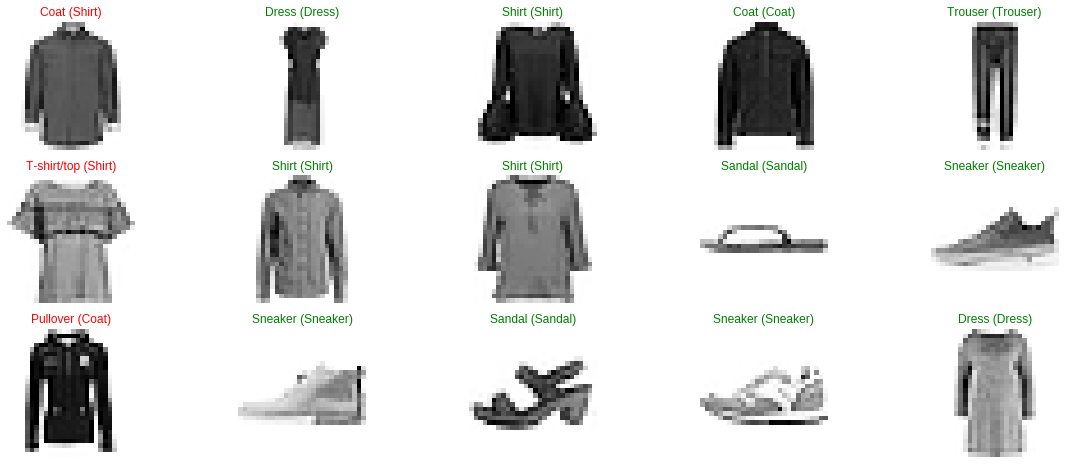

In [42]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Посмотрим теперь только на неверно предсказанные объекты:

In [0]:
y_hat_argmax = np.argmax(y_hat, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)
choose_wrong = ~(y_hat_argmax == y_test_argmax)
y_hat_wrong = y_hat[choose_wrong]
y_test_wrong = y_test[choose_wrong]
x_test_wrong = x_test[choose_wrong]

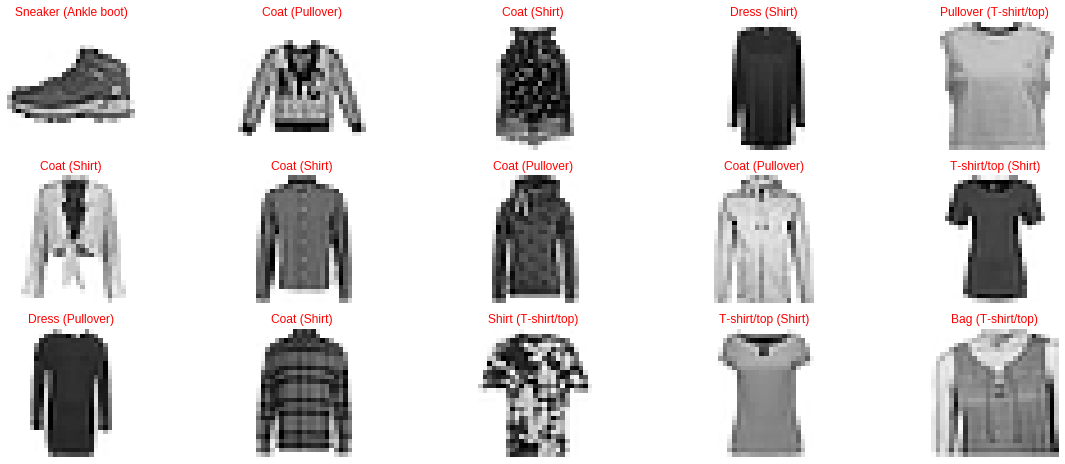

In [44]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(y_hat_wrong.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_wrong[index]))
    predict_index = np.argmax(y_hat_wrong[index])
    true_index = np.argmax(y_test_wrong[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Наконец, соберем метрики по каждому отдельному классу. Для этого есть метод classification_report в sklearn:

In [45]:
from sklearn.metrics import classification_report
y_test_arg = np.argmax(y_test, axis=1)
y_hat_arg = np.argmax(y_hat, axis=1)

print(classification_report(y_test_arg, y_hat_arg, target_names=fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.74      0.92      0.82      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.77      0.61      0.68      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.99      0.93      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [0]:
# Другая модель, которая работает несколько лучше:

In [0]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D
from keras.optimizers import SGD
chanDim = -1
classes = 10
INIT_LR = 1e-2

model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, -1)))

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

# return the constructed network architecture

In [0]:
#opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / 30)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [49]:
!pip install keras-tqdm

In [0]:
from keras_tqdm import TQDMNotebookCallback 

model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[TQDMNotebookCallback(leave_inner=True)])

Как видно, модель примерно на 5-ой эпохе достигает качества 0.92. А к 10-ой эпохе ~0.93